In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

# Load the Train and Test datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_length = len(train)
print('Train-Length : ' , train_length)

print('Test-Length : ', len(test))

test_col = len(test.columns)
print(test_col)

Train-Length :  614
Test-Length :  367
12


# Data Exploration

In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Print the unique values and their frequency of variable Property_Area
df = train.Property_Area.value_counts()
print(df)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


# Understanding Distribution of numerical variables

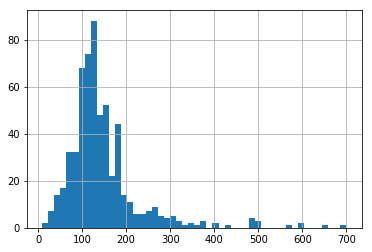

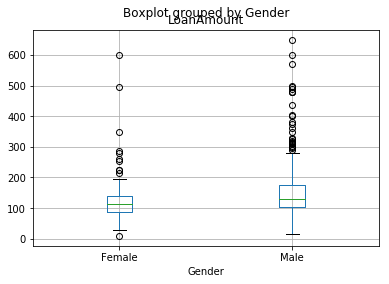

In [6]:
#Histogram for variable LoanAmount
train.LoanAmount.hist(bins=50)

#Box-Plot for LoanAmount by variable Gender on training dataset 
train.boxplot(column='LoanAmount', by='Gender')

In [7]:
#Approved loans in absolute numbers
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
#Two-way comparison: Credit History and Loan Status
pd.crosstab(train['Credit_History'], train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# Clean and Prepare Data

Find out which variables have missing values, and then see what is the best way to handle these missing values.
The way to handle a missing value can depend on the number of missing values, the type of variable and the expected importance of those variables.

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Imputing missing values

To fill the missing values of Continuous variables we can replace them with mean, median or estimate values based on other features of the data set.

**To impute missing values of Categorical variables, we look at the frequency table.** The simplest way is to impute with value which has highest frequency because there is a higher probability of success.

In [11]:
# Impute missing value of LoanAmount
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
test['LoanAmount'].fillna(168, inplace=True)

In [12]:
print(train['Self_Employed'].value_counts())
print(train['Gender'].value_counts())
print(train['Credit_History'].value_counts())
print(train['Loan_Amount_Term'].value_counts())
#print(train['Dependents'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [13]:
#imputing all other variables using above frequency table for both train and test
train['Self_Employed'].fillna('No', inplace=True)
train['Gender'].fillna('Male', inplace=True)
train['Credit_History'].fillna(1, inplace=True)
train['Loan_Amount_Term'].fillna(360, inplace=True)
#train['Dependents'].fillna(0, inplace=True)

test['Self_Employed'].fillna('No', inplace=True)
test['Gender'].fillna('Male', inplace=True)
test['Credit_History'].fillna(1, inplace=True)
test['Loan_Amount_Term'].fillna(360, inplace=True)
#test['Dependents'].fillna(0, inplace=True)

## Transform/Treat extreme values

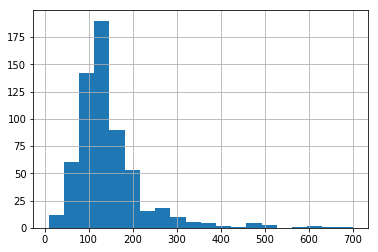

In [14]:
#For LoanAmount extreme values are practically possible, 
#i.e. some people might apply for high-value loans due to specific needs.
train['LoanAmount'].hist(bins=20)

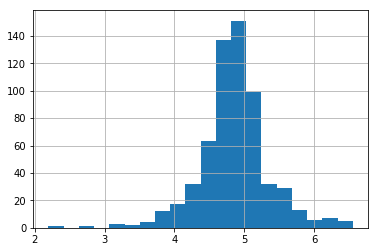

In [15]:
#Instead of treating these extreme values as outliers, do a log transformation to nullify their effect.
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [16]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

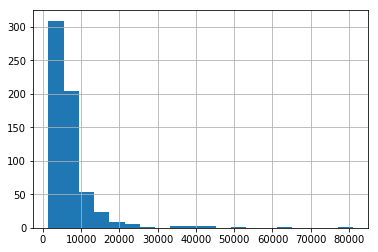

In [17]:
train['TotalIncome'].hist(bins=20)

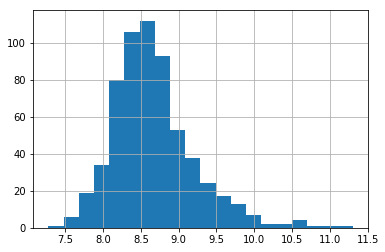

In [18]:
# Perform log transformation of TotalIncome to make it closer to normal
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20)

In [19]:
#Transform for test data as well
test['LoanAmount_log'] = np.log(test['LoanAmount'])

test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])

In [20]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


# Building Predictive Model

## Label Encoding

**"Scikit Learn" only works with numeric array. Hence, we need to label all the character variables into a numeric array.**

In [21]:
le = LabelEncoder()

train['Gender'] = le.fit_transform(train['Gender'].astype(str))
train['Married'] = le.fit_transform(train['Married'].astype(str))
train['Education'] = le.fit_transform(train['Education'].astype(str))
train['Self_Employed'] = le.fit_transform(train['Self_Employed'].astype(str))
train['Property_Area'] = le.fit_transform(train['Property_Area'].astype(str))
train['Loan_Status'] = le.fit_transform(train['Loan_Status'].astype(str))

train.drop(['ApplicantIncome', 'CoapplicantIncome', 'Dependents'], axis=1, inplace=True)

train.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,0,0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,1,0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
5,LP001011,1,1,0,1,267.000000,360.0,1.0,2,1,5.587249,9613.0,9.170872
6,LP001013,1,1,1,0,95.000000,360.0,1.0,2,1,4.553877,3849.0,8.255569
7,LP001014,1,1,0,0,158.000000,360.0,0.0,1,0,5.062595,5540.0,8.619750
8,LP001018,1,1,0,0,168.000000,360.0,1.0,2,1,5.123964,5532.0,8.618305
9,LP001020,1,1,0,0,349.000000,360.0,1.0,1,0,5.855072,23809.0,10.077819


In [22]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

le2 = LabelEncoder()

# apply le on categorical feature columns
test[categorical_cols] = test[categorical_cols].apply(lambda col: le2.fit_transform(col))

test.drop(['ApplicantIncome', 'CoapplicantIncome', 'Dependents'], axis=1, inplace=True)

test.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,1,1,0,0,110.0,360.0,1.0,2,4.700480,5720,8.651724
1,LP001022,1,1,0,0,126.0,360.0,1.0,2,4.836282,4576,8.428581
2,LP001031,1,1,0,0,208.0,360.0,1.0,2,5.337538,6800,8.824678
3,LP001035,1,1,0,0,100.0,360.0,1.0,2,4.605170,4886,8.494129
4,LP001051,1,0,1,0,78.0,360.0,1.0,2,4.356709,3276,8.094378
5,LP001054,1,1,1,1,152.0,360.0,1.0,2,5.023881,5587,8.628198
6,LP001055,0,0,1,0,59.0,360.0,1.0,1,4.077537,2226,7.707962
7,LP001056,1,1,1,0,147.0,360.0,0.0,0,4.990433,3881,8.263848
8,LP001059,1,1,0,0,280.0,240.0,1.0,2,5.634790,13633,9.520249
9,LP001067,1,0,1,0,123.0,360.0,1.0,1,4.812184,4800,8.476371


In [23]:
def classification_model(model, model_n):
    # Select three predictors Credit_History, Education and Gender
    predictors =['Credit_History','Education','Gender']

    # Converting predictors outcome to numpy array
    x_train = train[predictors].values
    y_train = train['Loan_Status'].values

    #Model fit
    model.fit(x_train, y_train)

    #Convert predictors and outcome to numpy array
    x_test = test[predictors].values

    #Predict output
    predicted = model.predict(x_test)

    #Reverse encoding for predicted outcome
    predicted = le.inverse_transform(predicted)

    #Store it in test df
    test['Loan_Status'] = predicted

    #Output file to make submission
    test.to_csv('Submission_{}.csv'.format(model_n), columns=['Loan_ID', 'Loan_Status'])
    
    print('Results saved to Submission{}.csv'.format(model_n))

In [25]:
#Logistic regression model
import sklearn.linear_model

model_lr = sklearn.linear_model.LogisticRegression()

classification_model(model_lr, 'log_r')

Results saved to Submissionlog_r.csv


/home/mayur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
#Decision Tree Classifier
import sklearn.tree

model_dt = sklearn.tree.DecisionTreeClassifier()

classification_model(model_dt, 'dt')

Results saved to Submissiondt.csv


In [28]:
#Random Forest Classifier
import sklearn.ensemble

model_rf = sklearn.ensemble.RandomForestClassifier()

classification_model(model_rf, 'rf')

Results saved to Submissionrf.csv


/home/mayur/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
